In [61]:
#Notas::


# checa que onda con correlated variables como year y milage (maybe estas no, porque afectan diferente no see)
# Checa otros scripts de kaggle, hay muchas buenas ideas

In [62]:
#import modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR

import statsmodels.api as sm

In [63]:
df = pd.read_csv("vw.csv")

In [64]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,T-Roc,2019,25000,Automatic,13904,Diesel,145,49.6,2.0
1,T-Roc,2019,26883,Automatic,4562,Diesel,145,49.6,2.0
2,T-Roc,2019,20000,Manual,7414,Diesel,145,50.4,2.0
3,T-Roc,2019,33492,Automatic,4825,Petrol,145,32.5,2.0
4,T-Roc,2019,22900,Semi-Auto,6500,Petrol,150,39.8,1.5


In [65]:
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [66]:
#df.describe()

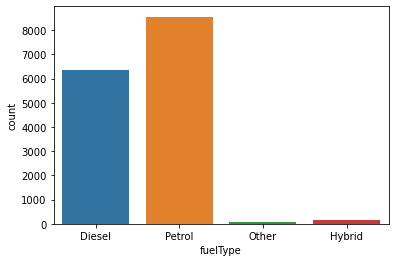

In [67]:
sns.countplot(df["fuelType"])

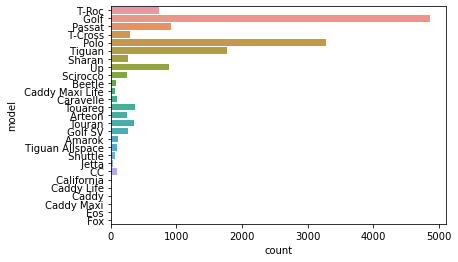

In [68]:
sns.countplot(y = df["model"])

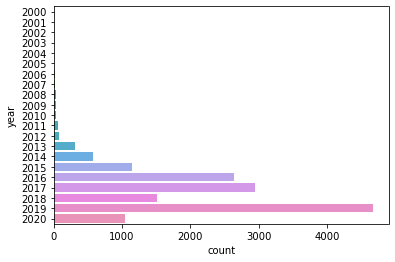

In [69]:
sns.countplot(y = df["year"])

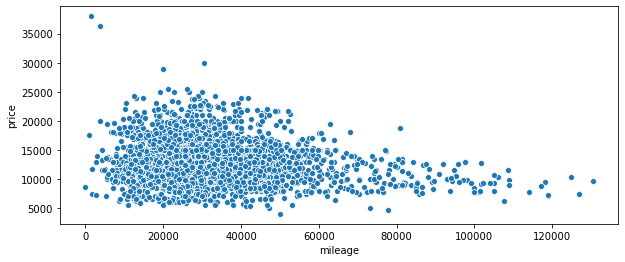

In [70]:
plt.figure(figsize=(10,4)) 
df2 = df[df["year"]==2016]
sns.scatterplot(df2["mileage"], df2["price"])

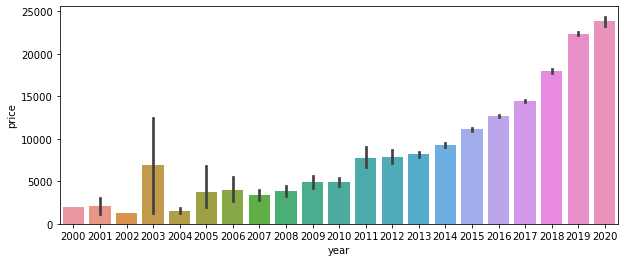

In [71]:
plt.figure(figsize=(10,4)) 
sns.barplot(x = df["year"], y = df["price"])

In [72]:
#sns.pairplot(df)

In [73]:
# OJO aqui en nuestro proyecto podria ser 
# df["age_of_car"] = (año de venta) - df["year"]

df["age_of_car"] = 2020 - df["year"]
df = df.drop(columns = ["year"])
df.sample(10)

,model,price,transmission,mileage,fuelType,tax,mpg,engineSize,age_of_car
9555,Polo,12300,Automatic,10548,Petrol,20,60.1,1.2,4
3065,Golf,18500,Manual,100,Petrol,150,44.8,1.5,1
13290,Beetle,8995,Manual,35212,Diesel,30,65.7,1.6,5
4741,Golf,14300,Manual,10623,Diesel,145,61.4,1.6,2
2190,Golf,16500,Semi-Auto,17043,Diesel,145,54.3,1.6,1
12975,Up,8970,Manual,2556,Petrol,145,54.3,1.0,1
4610,Golf,11999,Manual,32062,Diesel,20,68.9,2.0,4
5325,Golf,17000,Manual,15972,Petrol,150,47.1,1.5,1
14264,Touran,16776,Semi-Auto,21190,Diesel,125,60.1,2.0,4
13677,Touareg,20988,Semi-Auto,39500,Diesel,235,42.8,3.0,4


In [74]:
df = pd.get_dummies(df)
df.head()

# Este compa lo que hace es crear dummies para cada cosa con 0 y 1. Nosotros lo hariamos con 1,2,3,4?
# Probar que esta mejor
# si tiene mas sentido porque das mucho mas parametros a tu regrecion, es decir, si solo clasificaramos los
# modelos del 1 al n, solamente tendriamos una Beta para todos, la cual se haria mas grande mientras
# el numero del modelo sea mas grande, y esto no es efectivo, mejor tener una dummy para cada
# modelo que asigne una beta a cada uno..!!

,price,mileage,tax,mpg,engineSize,age_of_car,model_ Amarok,model_ Arteon,model_ Beetle,model_ CC,...,model_ Touareg,model_ Touran,model_ Up,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,25000,13904,145,49.6,2.0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,26883,4562,145,49.6,2.0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,20000,7414,145,50.4,2.0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
3,33492,4825,145,32.5,2.0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,22900,6500,150,39.8,1.5,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [75]:
# FALTA SCALING!!

In [76]:
# stratify??


X = df.drop("price", axis = "columns")
y = df["price"]

XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.25, random_state = 0)

In [77]:
X.columns

Index(['mileage', 'tax', 'mpg', 'engineSize', 'age_of_car', 'model_ Amarok',
       'model_ Arteon', 'model_ Beetle', 'model_ CC', 'model_ Caddy',
       'model_ Caddy Life', 'model_ Caddy Maxi', 'model_ Caddy Maxi Life',
       'model_ California', 'model_ Caravelle', 'model_ Eos', 'model_ Fox',
       'model_ Golf', 'model_ Golf SV', 'model_ Jetta', 'model_ Passat',
       'model_ Polo', 'model_ Scirocco', 'model_ Sharan', 'model_ Shuttle',
       'model_ T-Cross', 'model_ T-Roc', 'model_ Tiguan',
       'model_ Tiguan Allspace', 'model_ Touareg', 'model_ Touran',
       'model_ Up', 'transmission_Automatic', 'transmission_Manual',
       'transmission_Semi-Auto', 'fuelType_Diesel', 'fuelType_Hybrid',
       'fuelType_Other', 'fuelType_Petrol'],
      dtype='object')

In [78]:
# luego hace una madre para seleccionar best features (nos la saltamos)
# hay varias feature selection techniques, investigar de esto

In [79]:
model = Ridge()
model.fit(XTrain, yTrain)

Ridge()

In [80]:
model.score(XTrain, yTrain)

0.8878396636064102

In [81]:
model.score(XTest,yTest)

0.8917479053342318

(array([5.000e+00, 7.000e+00, 3.200e+01, 1.250e+02, 3.400e+02, 8.680e+02,
        1.165e+03, 8.550e+02, 2.610e+02, 5.000e+01, 1.800e+01, 1.900e+01,
        1.500e+01, 7.000e+00, 2.000e+00, 5.000e+00, 3.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 3.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

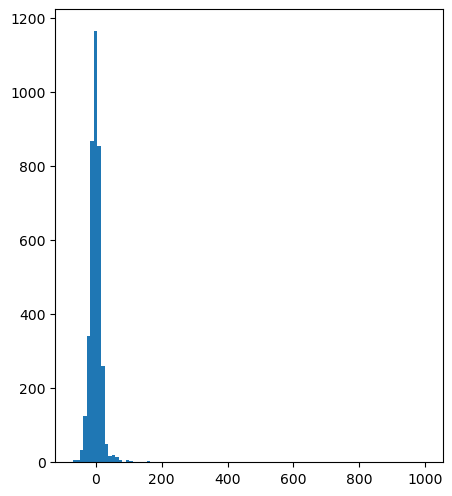

In [89]:
pred_ridge = model.predict(XTest)
error_ridge = (yTest-pred_ridge)/yTest*100
plot2 = plt.figure(1,figsize=(5,6), dpi=100)
plt.hist(error_ridge,100)

In [83]:
XTest.head()

,mileage,tax,mpg,engineSize,age_of_car,model_ Amarok,model_ Arteon,model_ Beetle,model_ CC,model_ Caddy,...,model_ Touareg,model_ Touran,model_ Up,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
6617,1155,145,45.6,1.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3515,20742,30,62.8,2.0,3,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
8241,35254,20,60.1,1.2,4,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
167,4407,145,50.4,1.6,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
1391,29441,20,67.3,2.0,4,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0


In [84]:
yTest.head()

6617    23500
3515    19990
8241    10395
167     19995
1391    16298
Name: price, dtype: int64

In [85]:
model2 = RandomForestRegressor()#max_depth=2, random_state=0)
model2.fit(XTrain, yTrain)
model2.score(XTest,yTest)

0.9482501040214277

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   2.,   0.,   0.,   0.,   0.,   1.,   1.,
          1.,   1.,   0.,   0.,   1.,   0.,   0.,   1.,   0.,   2.,   1.,
          0.,   0.,   2.,   1.,   0.,   3.,   1.,   1.,   0.,   3.,   1.,
          2.,   1.,   2.,   1.,   3.,   2.,  12.,  15.,  16.,  13.,  29.,
         35.,  29.,  41.,  71.,  97., 111., 161., 226., 259., 266., 357.,
        432., 354., 299., 235., 183., 119., 108.,  77.,  60.,  49.,  32.,
         18.,  16.,   8.,  11.,   5.,   3.,   2.,   2.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          2.]),
 array([-111.59322191, -109.9145066 , -108.23579129, -106.55707598,
        -104.87836067, -103.19964535, -101.52093004,  -99.84221473,
         -98.16349942,  -96.48478411,  -94.80606879,  -93.12735348,
         -91.44863817,  -89.76992286,  -88.09120755,  -86.41249223,
         -84.73377692,  -83.05506161,  -81.376

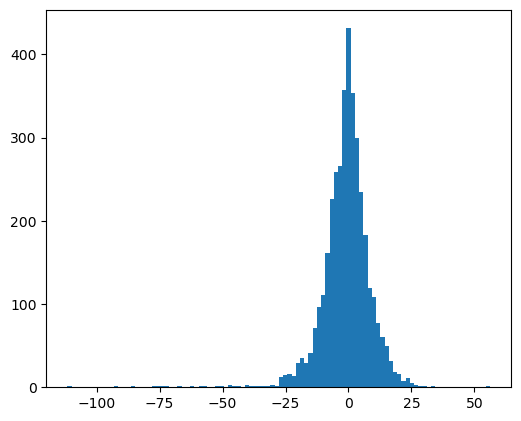

In [88]:
a = model2.predict(XTest)
pred_forest = model2.predict(XTest)
error_forest = (yTest-pred_forest)/yTest*100
plot3 = plt.figure(2,figsize=(6,5), dpi=100)
plt.hist(error_forest,100)

In [87]:
error_forest.abs().mean()

6.632754464647236

In [90]:
error_forest.std()

9.886059714034765

In [91]:
len(error_forest)

3790